In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Read a sample of the dataset
uber_df = pd.read_csv("uber-raw-data-sep14.csv", nrows=10000)  # Sample 10,000 rows
print(uber_df.head(5))

# Convert 'date/time' column from string to datetime
uber_df['Date/Time'] = pd.to_datetime(uber_df['Date/Time'])

# Extract additional time features
uber_df['Day'] = uber_df['Date/Time'].dt.day
uber_df['Hour'] = uber_df['Date/Time'].dt.hour
uber_df['Weekday'] = uber_df['Date/Time'].dt.weekday


C:\Users\sameer\AppData\Local\Temp\ipykernel_19304\4074609398.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


          Date/Time      Lat      Lon    Base
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512


Here we take a sample from the dataset (1,000,000+ rows) for performance. This can be adjusted later based on analytic requirements. Then some simple data cleansing for the date/time features. 

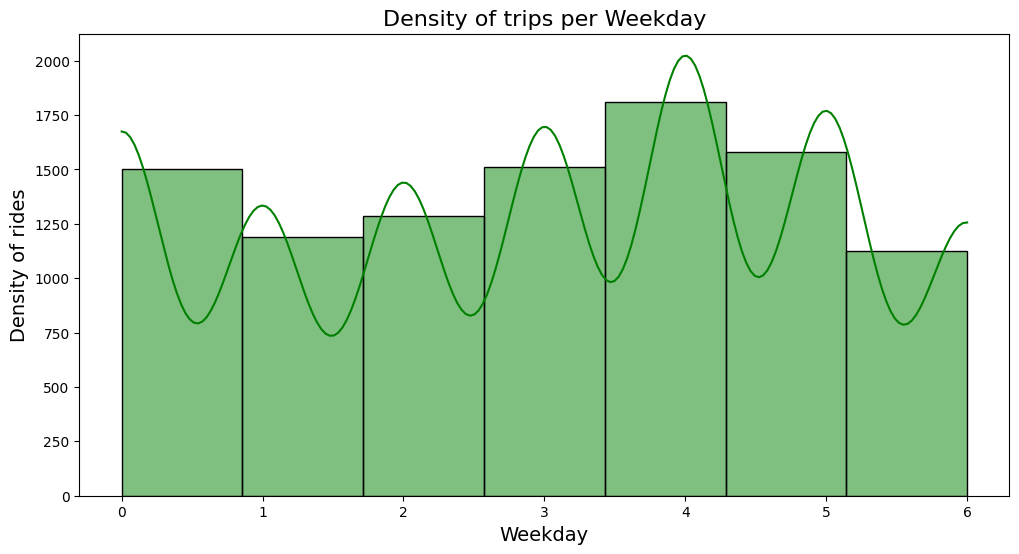

In [2]:
# Visualize the Density of rides per weekday
plt.figure(figsize=(12, 6))
sns.histplot(uber_df['Weekday'], bins=7, kde=True, color='green')
plt.title("Density of trips per Weekday", fontsize=16)
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)
plt.show()

From the visualization showing distribution of Uber trips across different weekdays, we can observe whether there are any significant differences in Uber usage patterns on different days of the week. For example, we might expect more rides on weekdays compared to weekends due to commuting patterns.

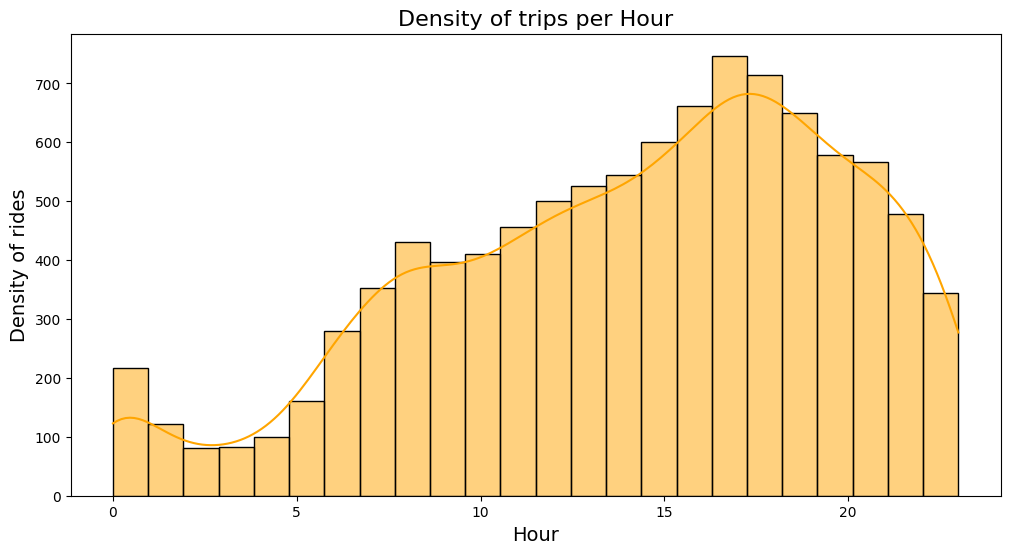

In [3]:
# Visualize the Density of rides per hour
plt.figure(figsize=(12, 6))
sns.histplot(uber_df['Hour'], bins=24, kde=True, color='orange')
plt.title("Density of trips per Hour", fontsize=16)
plt.xlabel("Hour", fontsize=14)
plt.ylabel("Density of rides", fontsize=14)
plt.show()

This histogram depicts the distribution of Uber trips across different hours of the day. We can identify peak hours and periods of low activity. Understanding these patterns can be useful for scheduling drivers or allocating resources efficiently.

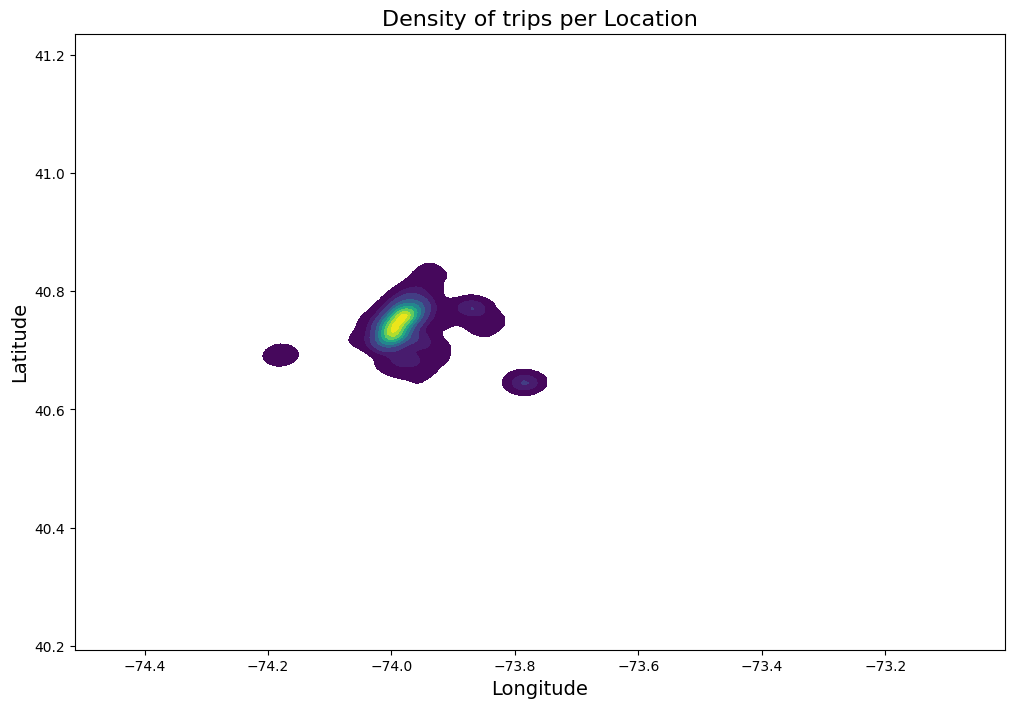

In [4]:
# Heat Map - Density of trips per location
plt.figure(figsize=(12, 8))
sns.kdeplot(x=uber_df['Lon'], y=uber_df['Lat'], cmap='viridis', fill=True)
plt.title("Density of trips per Location", fontsize=16)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.show()

This heat map represents the density of Uber trips across various geographical locations and where the highest concentration of Uber rides are located. It can help identify popular pickup and drop-off locations, as well as areas with lower demand. This information could inform decisions related to driver deployment and marketing strategies.

In [5]:
# Linear Regression
# Predicting number of rides per hour
hourly_counts = uber_df.groupby('Hour').size().reset_index(name='Counts')
X = hourly_counts['Hour'].values.reshape(-1, 1)
y = hourly_counts['Counts'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

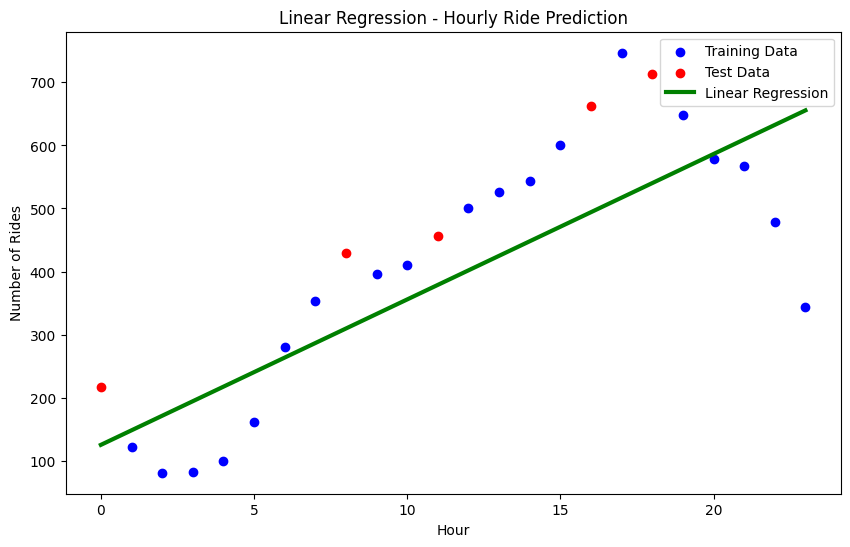

In [6]:
# Visualizing the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X, model.predict(X), color='green', linewidth=3, label='Linear Regression')
plt.title('Linear Regression - Hourly Ride Prediction')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')
plt.legend()
plt.show()

A scatter plot of the number of rides per hour, along with a linear regression line. The linear regression line helps to identify trends or patterns in the data. In this case, it allows us to visualize the overall trend of Uber ride counts over different hours of the day. Additionally, we can evaluate the performance of the linear regression model in predicting ride counts based on the hour of the day.